#0) Library Import

In [2]:
pip install flask

In [3]:
pip install pipenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 25.5 MB/s eta 0:00:00


In [4]:
pip install pymanopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 651.3 kB/s eta 0:00:00


In [5]:
mkdir lab_1

In [6]:
cd lab_1

/content/lab_1


In [7]:
import numpy as np
import sklearn
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import cv2

from sklearn.datasets import load_wine, load_iris
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn import cluster,datasets,mixture
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from numpy import linalg as LA
from PIL import Image
from matplotlib.image import imread
from matplotlib.lines import Line2D
from io import BytesIO
from scipy.spatial import distance


#1) Spectral Clustering

According to documentation, Spectral clustering is an EDA technique based on  graph teory. Since it is a flexible method, it also allows to to cluster non graph data as well.

Spectral Clustering is an EDA technique used to reduce dimensionality in complex datasets which forms clusters of similar data in rarer dimensions.

it's a popular machine learning technique used for clustering data points. It is based on spectral graph theory and is particularly useful when dealing with complex data structures that may not be well-separated in the original feature space.

a. Spectral clustering is more useful in the following cases:
   - Non-linearly separable data: When traditional clustering methods like k-means or hierarchical clustering fail to cluster data points correctly due to non-linearity in the data, spectral clustering can be effective.
   - Graph-based data: Spectral clustering is well-suited for data represented as graphs or networks, where data points are connected by edges. It can uncover community structures within such networks.
   - Unequal cluster sizes and shapes: Spectral clustering can handle clusters of irregular shapes and sizes, which can be challenging for some other clustering algorithms.
   - High-dimensional data: Spectral clustering can be applied to high-dimensional data after dimensionality reduction, such as using techniques like Principal Component Analysis (PCA).

b. The mathematical fundamentals of spectral clustering are rooted in linear algebra and graph theory:
   - **Graph Laplacian**: Spectral clustering uses the Laplacian matrix of a similarity graph created from the data points. There are different types of Laplacian matrices, such as the unnormalized Laplacian, normalized Laplacian, and the symmetric normalized Laplacian.
   - **Eigenvalue Decomposition**: The Laplacian matrix is decomposed into its eigenvalues and corresponding eigenvectors. The first few eigenvectors (associated with the smallest eigenvalues) are used for clustering.
   - **Spectral Embedding**: The eigenvectors are treated as coordinates in a lower-dimensional space, and spectral clustering finds clusters in this reduced space.

c. The steps to compute spectral clustering typically involve:
   1. Constructing a similarity graph: Create a graph where nodes represent data points, and edges represent pairwise similarities (e.g., using Gaussian affinity or k-nearest neighbors).
   2. Computing the Laplacian matrix: Calculate the Laplacian matrix of the similarity graph (usually the normalized Laplacian).
   3. Eigenvalue decomposition: Find the eigenvalues and eigenvectors of the Laplacian matrix.
   4. Dimensionality reduction: Select a subset of eigenvectors (usually the first k eigenvectors corresponding to the smallest eigenvalues) to reduce the dimensionality of the data.
   5. Clustering: Apply a standard clustering algorithm (e.g., k-means) to the reduced-dimensional data.

d. Yes, it holds ralation with previous concepts studied in class, such as matrix decomposition (it involves computation of both eigenvalues and eigenvectors), dimensionality reduction like PCA since it could be applied to high-dimensional data after dimensionality reduction, and k-means itself since it is one of the algorithm's steps to compute it.



#2) DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm widely used in machine learning and data analysis.

a. DBSCAN is more useful in the following cases:
   - **Irregularly shaped clusters**: It is effective at identifying clusters of arbitrary shapes and sizes because it doesn't assume that clusters are convex or globular.
   - **Varying cluster densities**: DBSCAN can handle clusters with different densities, making it suitable for datasets where clusters are not uniformly distributed.
   - **Noise and outliers**: It can identify and label data points that do not belong to any cluster as noise or outliers.
   - **Minimal hyperparameter tuning**: DBSCAN requires minimal hyperparameter tuning compared to algorithms like k-means, which need the number of clusters as a parameter.

b. The mathematical fundamentals of DBSCAN are rooted in the concept of density and distance:
   - **Core points**: DBSCAN defines a neighborhood around each data point by considering an ε (epsilon) radius. Data points with at least a minimum number of neighbors within this radius are called "core points."
   - **Border points**: Points that are within the ε radius of a core point but do not have enough neighbors to be core points themselves are labeled as "border points."
   - **Noise points**: Data points that are neither core points nor border points are considered "noise points" or outliers.
   - **Reachability**: DBSCAN uses the reachability concept to determine cluster membership. A point is considered reachable from another point if there is a path of core points between them.

c. DBSCAN and Spectral Clustering are both clustering algorithms, but they operate based on different principles and are typically used in different scenarios:

   - **Density vs. Graph-Based**: DBSCAN is a density-based clustering algorithm that identifies clusters based on regions of high data point density. In contrast, Spectral Clustering is a graph-based clustering algorithm that operates on a similarity graph constructed from the data.

   - **Cluster Shape**: DBSCAN can handle clusters of arbitrary shapes and sizes, making it suitable for irregularly shaped clusters. Spectral Clustering, while powerful, may struggle with non-convex or irregularly shaped clusters.

   - **Parameters**: DBSCAN primarily requires two parameters: ε (epsilon), which defines the neighborhood size, and MinPts, which specifies the minimum number of points required to form a dense region. Spectral Clustering typically requires more parameter tuning, including the number of clusters to be specified.

   

#3) Elbow method

The elbow method is a heuristic used in clustering to find the optimal number of clusters in a dataset. It is a graphical approach that involves plotting the explained variation (or a related measure) as a function of the number of clusters and looking for an "elbow" point on the graph where the explained variation starts to level off. This point is often interpreted as the optimal number of clusters.

Here's how the elbow method works:

1. Compute the clustering algorithm (e.g., k-means) for a range of different values of k (the number of clusters). Typically, you would choose a range of k values that make sense for your problem.

2. For each value of k, calculate a measure of clustering quality or explained variation. The most common metric used is the within-cluster sum of squares (WCSS) for k-means, which measures the squared distance of data points within each cluster to their cluster's centroid. Alternatively, you can use other metrics like silhouette score, Davies-Bouldin index, or the Calinski-Harabasz index, depending on the algorithm and your problem.

3. Plot the value of the clustering quality metric against the number of clusters (k).

4. Look for the "elbow" point on the graph. This is the point where the curve starts to flatten out, indicating that increasing the number of clusters beyond this point does not significantly improve the clustering quality.

The idea behind the elbow method is to find a balance between model complexity (more clusters) and the ability of the model to explain the variation in the data. The "elbow" point represents a reasonable trade-off between these factors.

However, the elbow method has some flaws and limitations:

1. Ambiguity in Elbow Point: Determining the exact location of the "elbow" can be subjective, and different analysts might interpret the graph differently. It's not always clear-cut where the curve starts to level off.

2. Doesn't Work for All Datasets: The elbow method assumes that the clusters are well-separated and that there is a clear point at which adding more clusters doesn't improve the model. In reality, some datasets may not have a distinct "elbow," and the method may not work well for complex data distributions.

3. Depends on the Choice of Clustering Metric: The choice of the clustering quality metric used in the elbow method can affect the results. Different metrics may lead to different interpretations of the optimal number of clusters.

4. Sensitivity to Data Scaling: The elbow method can be sensitive to the scale of the features in your dataset. It's a good practice to standardize or normalize your data before applying the method.

5. Doesn't Consider Cluster Shape: The elbow method is based on the variance or clustering quality metric and doesn't take into account the shape or geometry of the clusters. Some clustering algorithms, like DBSCAN or Spectral Clustering, can handle non-convex or irregularly shaped clusters that the elbow method might not detect.



#4) K-Means, k-medoids

##a. K-Means

In [8]:
class KMeans:
    def __init__(self, n_clusters, max_iters=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None

    def initialize_centroids(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[indices]

    def find_closest_centroid(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

    def fit(self, X):
        self.initialize_centroids(X)
        for _ in range(self.max_iters):
            labels = self.find_closest_centroid(X)
            new_centroids = self.update_centroids(X, labels)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

    def transform(self, X):
        return self.find_closest_centroid(X)


##b. K-Medoids

In [9]:
class KMedoids:
    def __init__(self, n_clusters, max_iters=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.medoids = None

    def initialize_medoids(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.medoids = X[indices]

    def find_closest_medoid(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.medoids, axis=2)
        return np.argmin(distances, axis=1)

    def update_medoids(self, X, labels):
        new_medoids = np.array([X[labels == i][np.argmin(np.sum(np.abs(X[labels == i] - X[labels == i][:, np.newaxis]), axis=2))] for i in range(self.n_clusters)])
        return new_medoids

    def fit(self, X):
        self.initialize_medoids(X)
        for _ in range(self.max_iters):
            labels = self.find_closest_medoid(X)
            new_medoids = self.update_medoids(X, labels)
            if np.all(self.medoids == new_medoids):
                break
            self.medoids = new_medoids

    def transform(self, X):
        return self.find_closest_medoid(X)


##c. Consistency with Scikit-Learn API already achieved.

#5) Use of clustering algorithms with toy data

##a. Creation of toy data

In [10]:
X,y=make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=1,\
               center_box=(-10.0,10.0),shuffle=True,random_state=1,)

##b. Resulting plots

###K-Means

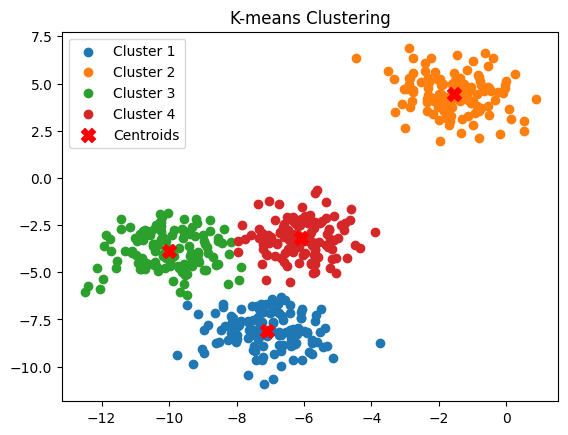

In [11]:
kmeans = KMeans(n_clusters=4, random_state=40)
kmeans.fit(X)
labels = kmeans.transform(X)

clusters_count = kmeans.n_clusters

# Visualize the results
cluster_labels = [f'Cluster {i+1}' for i in range(clusters_count)] # Generate cluster labels dynamically
for cluster_label in range(clusters_count):
    plt.scatter(X[labels == cluster_label, 0], X[labels == cluster_label, 1], label=cluster_labels[cluster_label])
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='X', s=100, c='red', label='Centroids')
plt.title("K-means Clustering")
plt.legend()
plt.show()

In [12]:
# Distance between centroids
centroids = kmeans.centroids #Calculate the centroid of each cluster

# Compute pairwise distances between cluster centroids
cluster_distances = distance.cdist(centroids, centroids)

# Create a Pandas DataFrame to represent the distance matrix
df_distances = pd.DataFrame(cluster_distances)

# Set column and row names using cluster labels
df_distances.columns = [f'{label}' for label in cluster_labels]
df_distances.index = [f'{label}' for label in cluster_labels]

# Print the distance matrix with labels
print("Distance Matrix between Centroids:")
print(df_distances)


Distance Matrix between Centroids:
           Cluster 1  Cluster 2  Cluster 3  Cluster 4
Cluster 1   0.000000  13.718258   5.163196   5.038835
Cluster 2  13.718258   0.000000  11.846134   8.860998
Cluster 3   5.163196  11.846134   0.000000   3.982951
Cluster 4   5.038835   8.860998   3.982951   0.000000


###K-Medoids

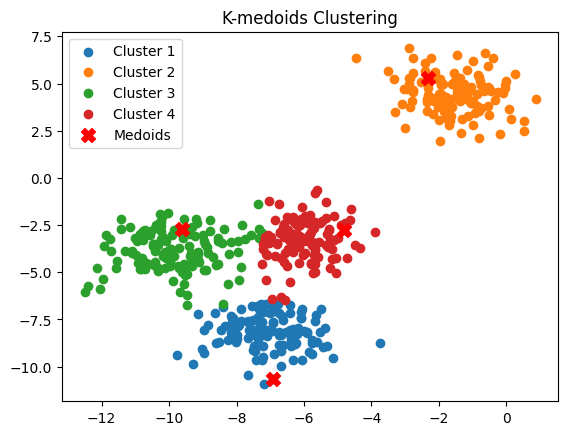

In [13]:
kmedoids = KMedoids(n_clusters=4, random_state=40)
kmedoids.fit(X)
labels = kmedoids.transform(X)

clusters_count = kmedoids.n_clusters

# Visualize the results
cluster_labels = [f'Cluster {i+1}' for i in range(clusters_count)] # Generate cluster labels dynamically
for cluster_label in range(clusters_count):
    plt.scatter(X[labels == cluster_label, 0], X[labels == cluster_label, 1], label=cluster_labels[cluster_label])
plt.scatter(kmedoids.medoids[:, 0], kmedoids.medoids[:, 1], marker='X', s=100, c='red', label='Medoids')
plt.title("K-medoids Clustering")
plt.legend()
plt.show()

In [14]:
# Distance between medoids
medoids = kmedoids.medoids # Calculate the medoid of each cluster

#Compute pairwise distances between cluster medoids
cluster_distances = distance.cdist(medoids, medoids)

# Create a Pandas DataFrame to represent the distance matrix
df_distances = pd.DataFrame(cluster_distances)

# Set column and row names using cluster labels
df_distances.columns = [f'{label}' for label in cluster_labels]
df_distances.index = [f'{label}' for label in cluster_labels]

# Print the distance matrix with labels
print("Distance Matrix between Medoids:")
print(df_distances)


Distance Matrix between Medoids:
           Cluster 1  Cluster 2  Cluster 3  Cluster 4
Cluster 1   0.000000  16.631155   8.397444   8.173101
Cluster 2  16.631155   0.000000  10.867229   8.461532
Cluster 3   8.397444  10.867229   0.000000   4.812490
Cluster 4   8.173101   8.461532   4.812490   0.000000


In this particular scenario we can see there are 4 clusters.

Both K-means and K-medoids algorithms had similar results, however we can see that the overall distances between medoids are bigger than the distances bewtween centroids.

##c.Silhouette plots

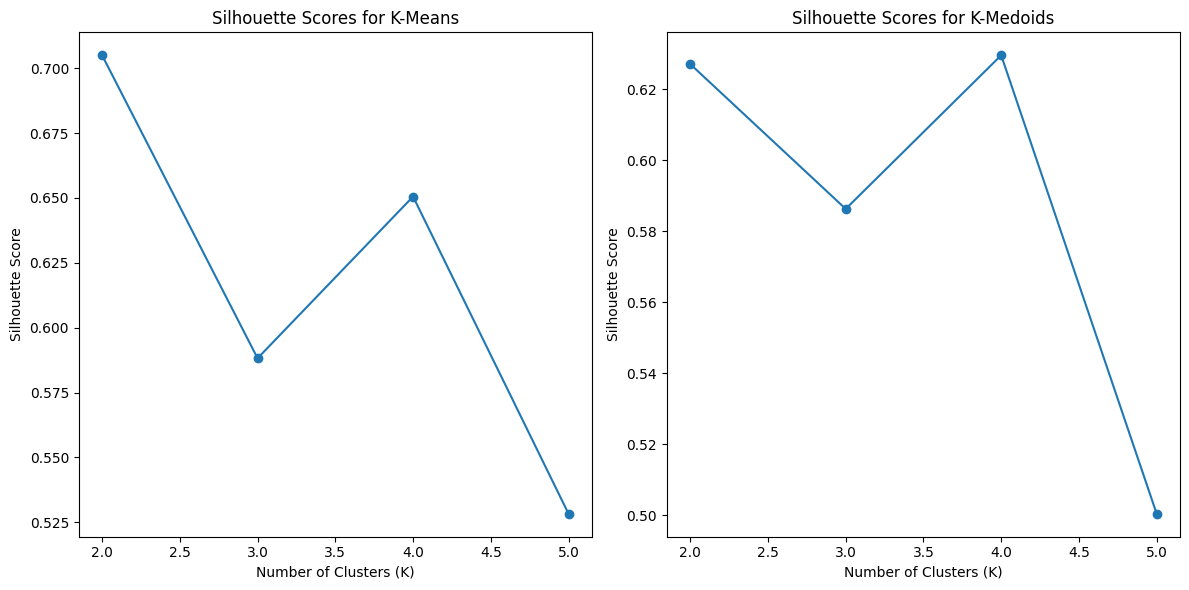

In [15]:
# Create arrays to store silhouette scores
kmeans_scores = []
kmedoids_scores = []

# Iterate over K values from 2 to 5
for k in range(2, 6):
    # K-Means
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(X)
    kmeans_labels = kmeans.transform(X)
    kmeans_silhouette = silhouette_score(X, kmeans_labels)
    kmeans_scores.append(kmeans_silhouette)

    # K-Medoids
    kmedoids = KMedoids(n_clusters=k, random_state=40)
    kmedoids.fit(X)
    kmedoids_labels = kmedoids.transform(X)
    kmedoids_silhouette = silhouette_score(X, kmedoids_labels)
    kmedoids_scores.append(kmedoids_silhouette)

# Plot silhouette scores for K-Means and K-Medoids
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 6), kmeans_scores, marker='o', linestyle='-')
plt.title('Silhouette Scores for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(range(2, 6), kmedoids_scores, marker='o', linestyle='-')
plt.title('Silhouette Scores for K-Medoids')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


##d. Silhouette results findings

Since having 1 cluster would not make sense to the goal of clustering algorithms, we iterated K values from 2 to 5.

According to the plots and scores obtained above, the optimal number of clusters (k) for each algrithm is 2 for K-means and 4 for K-medoids.

When looking the data distribution we would expect at least 4 clusters or data groups, which is consistant with the obtained results using the k-medoids algorithm. However, do to how centroids are computed within the k-means algorithm, it suggest to group the data in 2 clusters.

Even though this is a toy dataset, the final desicion of chosing an specific K is up to the business expert or the data contexts itself.

#6) Use of Scikit-Learn clustering libraries

##Data generation

In [16]:
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long runningtimes
#============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6,-0.6], [-0.4,0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

#blobs with varied variances
varied =datasets.make_blobs(n_samples=n_samples,cluster_std=[1.0,2.5,0.5],\
                           random_state=random_state)

##a. Dataset plotting

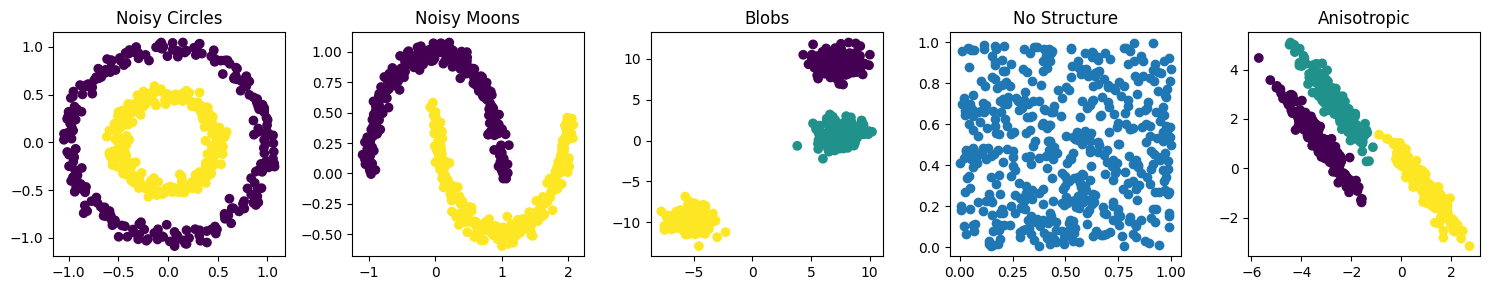

In [17]:
# Create separate figures for each dataset
plt.figure(figsize=(15, 3))

# Noisy Circles
plt.subplot(1, 5, 1)
plt.scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1], c=noisy_circles[1])
plt.title('Noisy Circles')

# Noisy Moons
plt.subplot(1, 5, 2)
plt.scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1], c=noisy_moons[1])
plt.title('Noisy Moons')

# Blobs
plt.subplot(1, 5, 3)
plt.scatter(blobs[0][:, 0], blobs[0][:, 1], c=blobs[1])
plt.title('Blobs')

# No Structure
plt.subplot(1, 5, 4)
plt.scatter(no_structure[0][:, 0], no_structure[0][:, 1])
plt.title('No Structure')

# Anisotropic
plt.subplot(1, 5, 5)
plt.scatter(aniso[0][:, 0], aniso[0][:, 1], c=aniso[1])
plt.title('Anisotropic')

plt.tight_layout()
plt.show()


In [18]:
print("Shape of noisy_circles dataset:", noisy_circles[0].shape)


Shape of noisy_circles dataset: (500, 2)


After plotting each dataset, let's point out some of the key differences between each one of them:

Noisy Circles:

- The data is distributed in concentric circles.
- It have some noice, so it could affect the results obtained from different clustering algorithms.

Noisy Moons:

- The data distribution has crescent moon shapes.
- It also has noise, which adds difficulty to clustering.

Blobs:

- The data has well defined clusters.
- There is no noise involved.

No Structure:

- The data points seems to not have an apparent structure. Each one of them is randomly scattered.

Anisotropic:

- The data variance is different along different axes.
- Clusters have an elongated form.

##b. Applying Scikit-Learn clustering methods.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


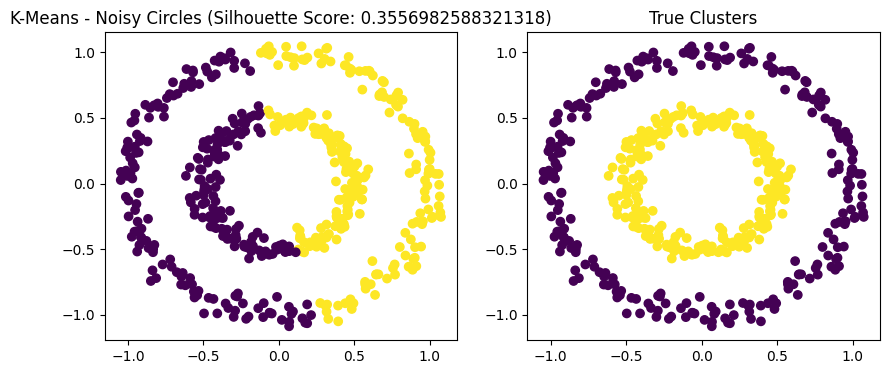

Algorithm: K-Means, Dataset: Noisy Circles, Silhouette Score: 0.3556982588321318


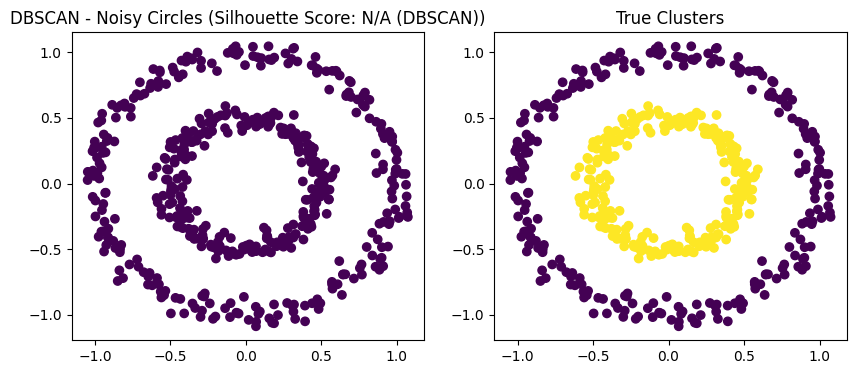

Algorithm: DBSCAN, Dataset: Noisy Circles, Silhouette Score: N/A (DBSCAN)


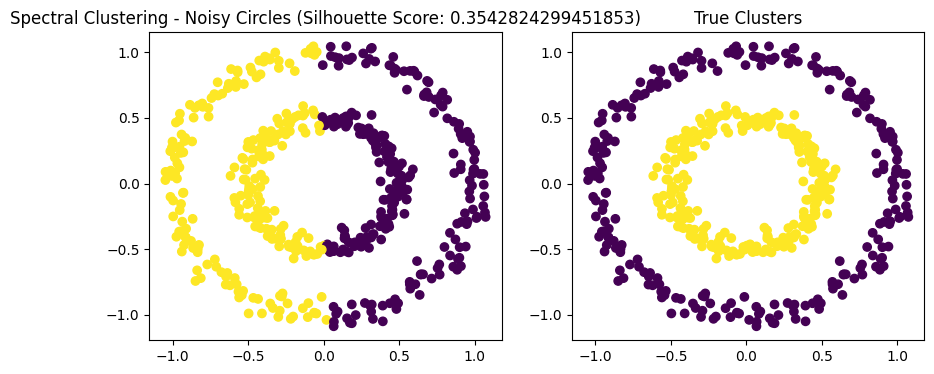

Algorithm: Spectral Clustering, Dataset: Noisy Circles, Silhouette Score: 0.3542824299451853


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


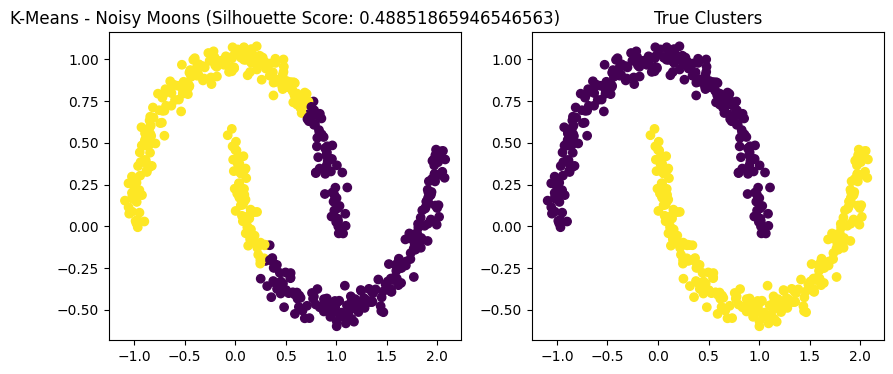

Algorithm: K-Means, Dataset: Noisy Moons, Silhouette Score: 0.48851865946546563


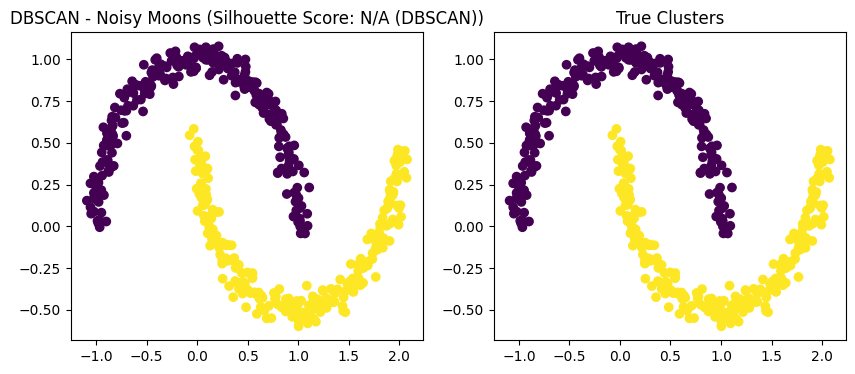

Algorithm: DBSCAN, Dataset: Noisy Moons, Silhouette Score: N/A (DBSCAN)


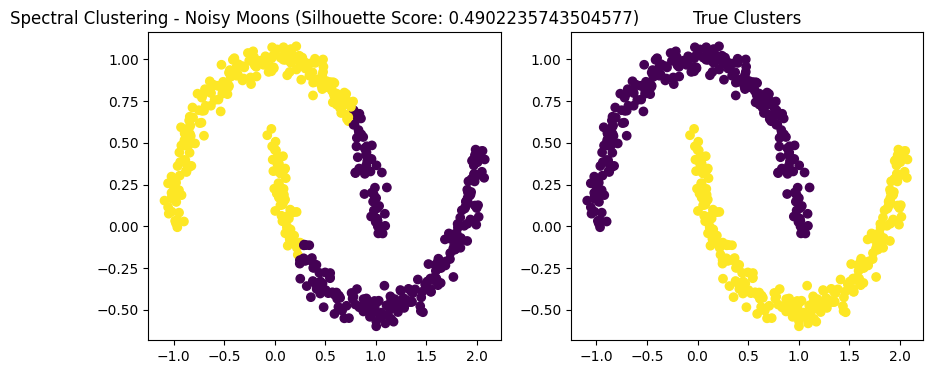

Algorithm: Spectral Clustering, Dataset: Noisy Moons, Silhouette Score: 0.4902235743504577


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


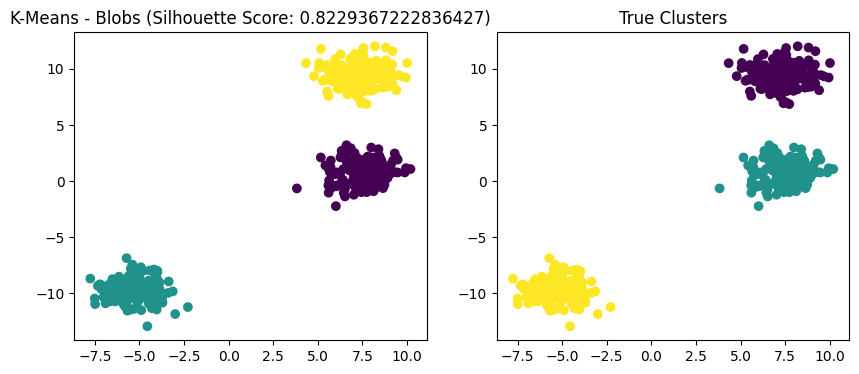

Algorithm: K-Means, Dataset: Blobs, Silhouette Score: 0.8229367222836427


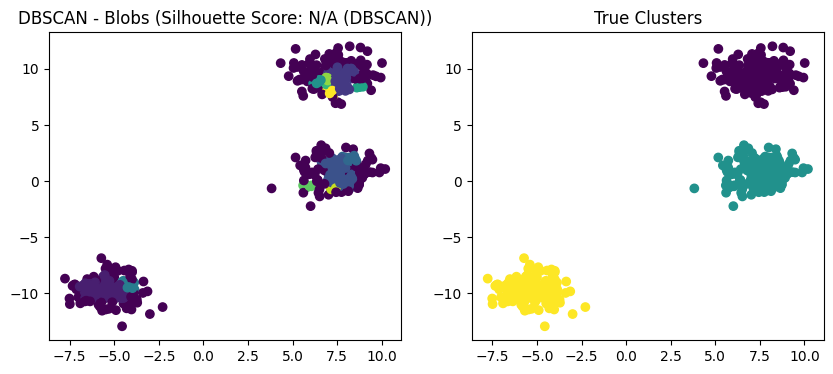

Algorithm: DBSCAN, Dataset: Blobs, Silhouette Score: N/A (DBSCAN)


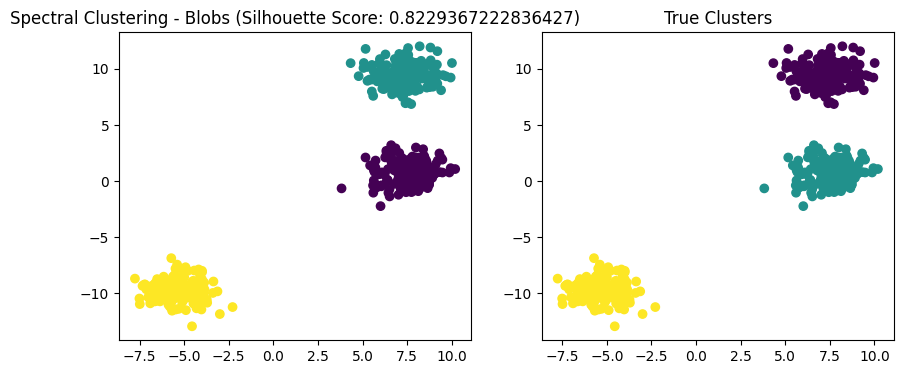

Algorithm: Spectral Clustering, Dataset: Blobs, Silhouette Score: 0.8229367222836427


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


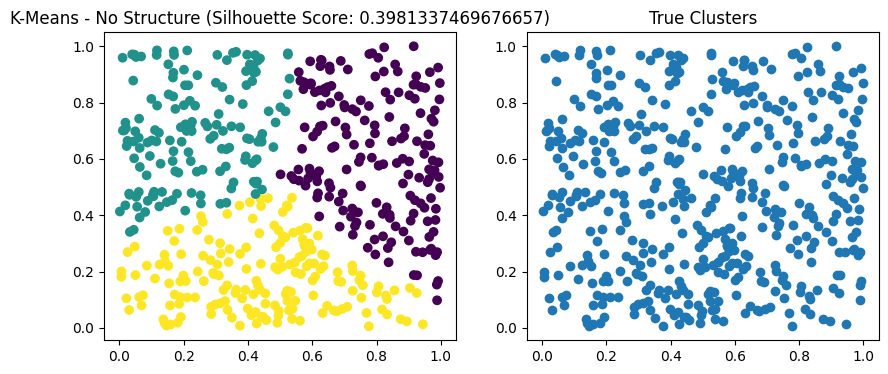

Algorithm: K-Means, Dataset: No Structure, Silhouette Score: 0.3981337469676657


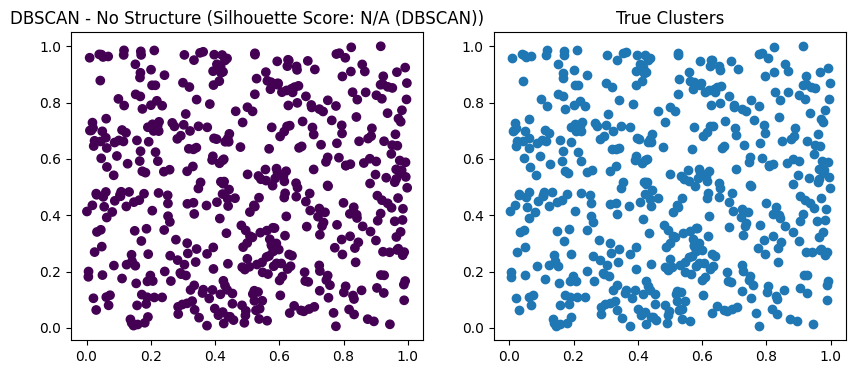

Algorithm: DBSCAN, Dataset: No Structure, Silhouette Score: N/A (DBSCAN)


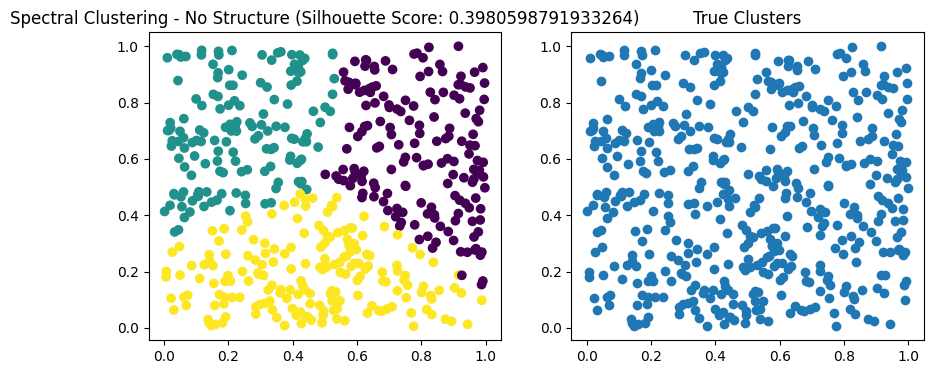

Algorithm: Spectral Clustering, Dataset: No Structure, Silhouette Score: 0.3980598791933264


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


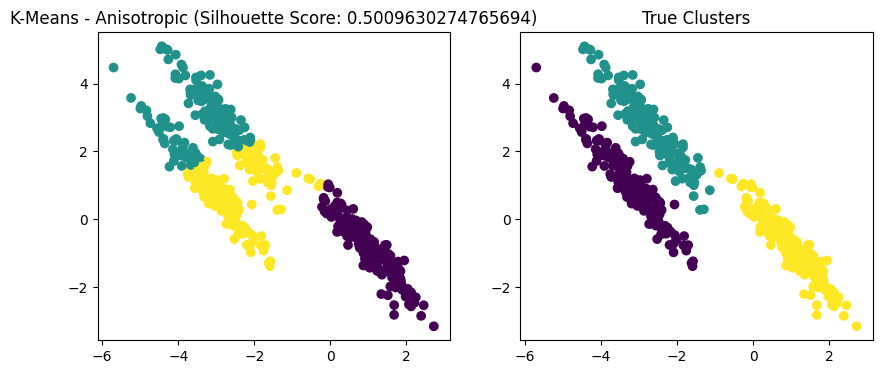

Algorithm: K-Means, Dataset: Anisotropic, Silhouette Score: 0.5009630274765694


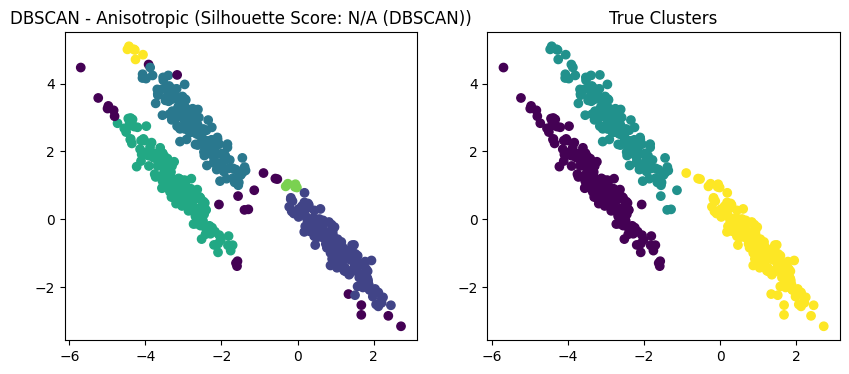

Algorithm: DBSCAN, Dataset: Anisotropic, Silhouette Score: N/A (DBSCAN)


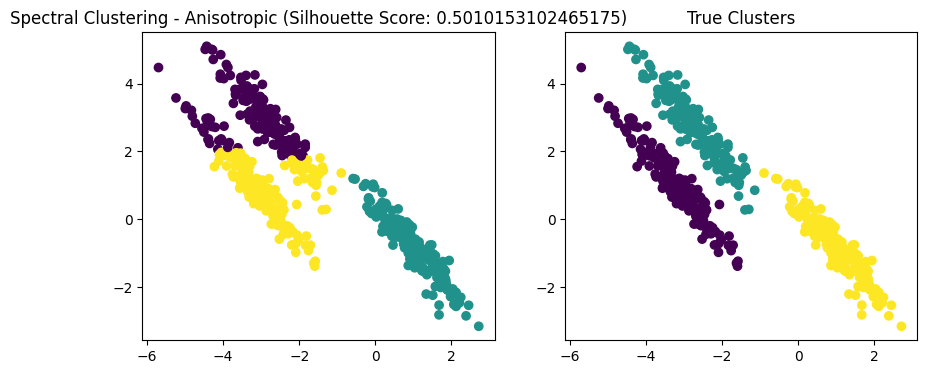

Algorithm: Spectral Clustering, Dataset: Anisotropic, Silhouette Score: 0.5010153102465175


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


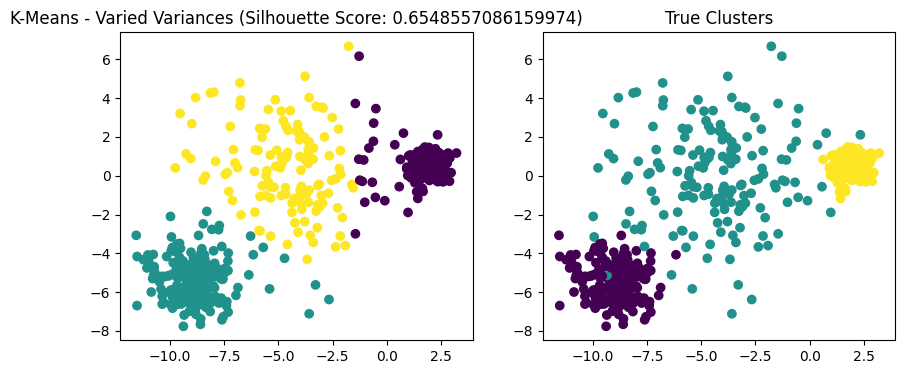

Algorithm: K-Means, Dataset: Varied Variances, Silhouette Score: 0.6548557086159974


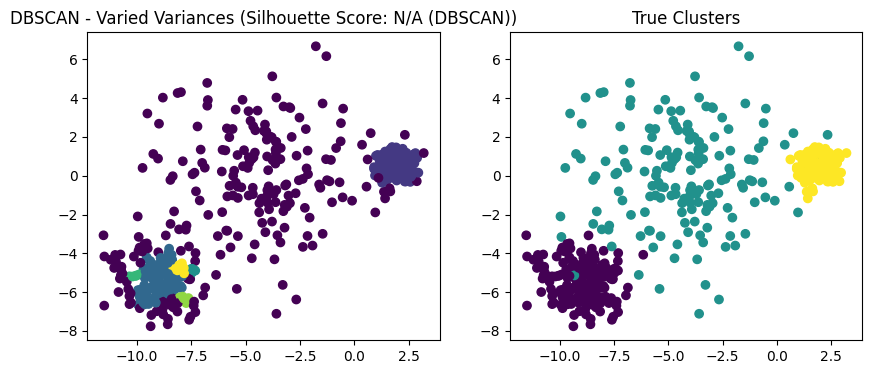

Algorithm: DBSCAN, Dataset: Varied Variances, Silhouette Score: N/A (DBSCAN)


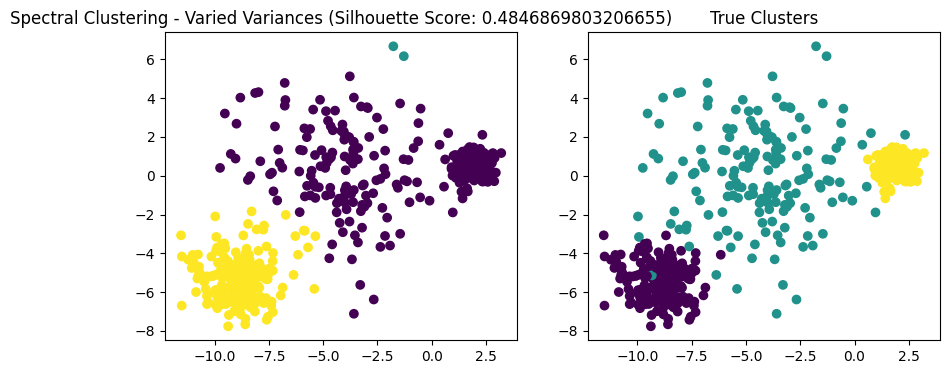

Algorithm: Spectral Clustering, Dataset: Varied Variances, Silhouette Score: 0.4846869803206655


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn import datasets
from sklearn.metrics import silhouette_score

# Define the clustering algorithms
algorithms = {
    "K-Means": KMeans(n_clusters=2),
    "DBSCAN": DBSCAN(eps=0.3, min_samples=5),
    "Spectral Clustering": SpectralClustering(n_clusters=2)
}

# Create a list of datasets
datasets_list = [
    ("Noisy Circles", noisy_circles),
    ("Noisy Moons", noisy_moons),
    ("Blobs", blobs),
    ("No Structure", no_structure),
    ("Anisotropic", aniso),
    ("Varied Variances", varied)
]

# Loop through datasets
for dataset_name, dataset in datasets_list:
    X = dataset[0]

    # Get the true number of clusters (if available)
    true_n_clusters = len(np.unique(dataset[1])) if dataset[1] is not None else None

    # Loop through clustering algorithms
    for algo_name, algorithm in algorithms.items():
        # If true number of clusters is available, set it
        if algo_name != "DBSCAN" and true_n_clusters is not None:
            algorithm.set_params(n_clusters=true_n_clusters)

        # Fit the algorithm to the data
        algorithm.fit(X)

        # Get cluster labels
        labels = algorithm.labels_

        # Calculate silhouette score (if applicable)
        if algo_name not in ["DBSCAN"]:
            silhouette_avg = silhouette_score(X, labels)
        else:
            silhouette_avg = "N/A (DBSCAN)"

        # Plot the results (for 2D datasets only)
        if X.shape[1] == 2:
            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            plt.scatter(X[:, 0], X[:, 1], c=labels)
            plt.title(f"{algo_name} - {dataset_name} (Silhouette Score: {silhouette_avg})")
            plt.subplot(1, 2, 2)
            plt.scatter(X[:, 0], X[:, 1], c=dataset[1])
            plt.title("True Clusters")
            plt.show()

        print(f"Algorithm: {algo_name}, Dataset: {dataset_name}, Silhouette Score: {silhouette_avg}")


Observations regarding the clustering methods used for each dataset:

Noisy Circles:

- All algortithms failed to properly separate the data, being DBSCAN the worst one.

Noisy Moons:

- Even though there is not a Silhouette score for DBSCAN method, said algorithm was the best to cluster this dataset.


Blobs:

- Both K-Means and Spectral clustering methods were quite good to gruop the data as intended.

No Structure:

- Since its data is randomly scattered, all algorithms failed to cluster said data. No apparent cluster could be made from it.

Anisotropic:

- Just by looking at the scatter plots is kind of hard to know which method works the best. However, silhouette score suggest Spectral clustering was the best one, even if all of them were not optimal.

Varied Variances:

- K-Means was the best clustering method, its silhouette score was slightly better than the others.